# Лабораторная работа №1

## Задание 1

### Импорт библиотек

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Загрузка данных временного ряда (Максимальная цена за торговый день по акциям TESLA на ежедневном уровне)

In [3]:
data = pd.read_csv("TSLA.csv", sep=';', parse_dates=True, index_col="Date", dayfirst=True)

### График временного ряда

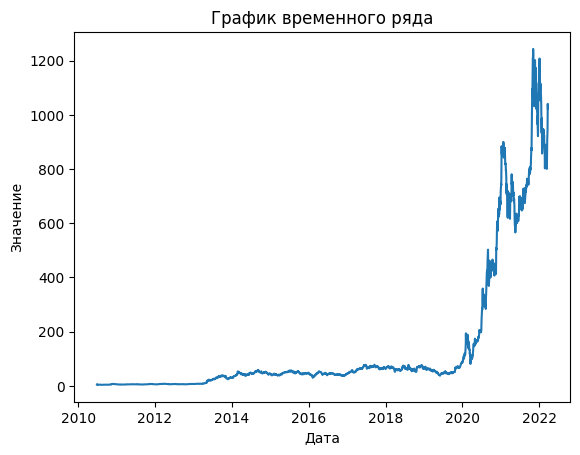

In [4]:
plt.plot(data.index, data["Value"])
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График временного ряда")
plt.show()

График временного ряда отображает динамику изменения цены актива во времени. 
Наблюдается восходящий тренд с резким увеличением цен, начиная примерно с 2020 года.

### Построение скользящих средних

In [5]:
data['MA_5'] = data['Value'].rolling(window=5).mean()
data['MA_10'] = data['Value'].rolling(window=10).mean()
data['MA_30'] = data['Value'].rolling(window=30).mean()
data['MA_50'] = data['Value'].rolling(window=50).mean()

### График скользящего среднего

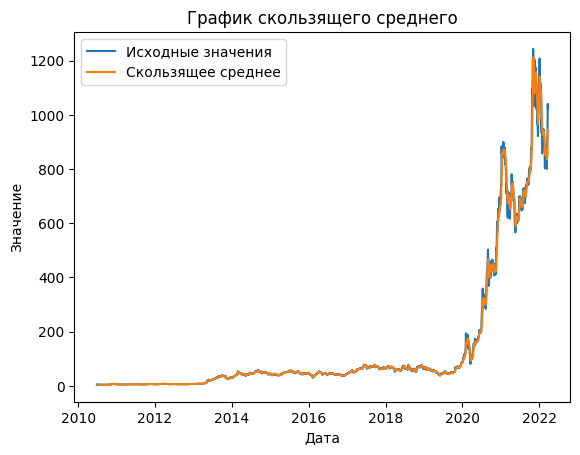

In [6]:
rolling_mean = data["Value"].rolling(window=7).mean()
plt.plot(data.index, data["Value"], label="Исходные значения")
plt.plot(data.index, rolling_mean, label="Скользящее среднее")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График скользящего среднего")
plt.legend()
plt.show()

График скользящего среднего сравнивает цены актива с 7-дневным скользящим средним.
Скользящее среднее сглаживает краткосрочные колебания, создавая более плавную линию, которая отображает общий тренд.
Скользящее среднее также демонстрирует восходящую тенденцию, соответствующую росту на графике исходных данных.
Это подтверждает, что актив находится в устойчивом восходящем тренде в течение указанного периода времени.

### Построение экспоненциальных скользящих средних

In [7]:
data['EMA_5'] = data['Value'].ewm(span=5, adjust=False).mean()
data['EMA_10'] = data['Value'].ewm(span=10, adjust=False).mean()
data['EMA_30'] = data['Value'].ewm(span=30, adjust=False).mean()
data['EMA_50'] = data['Value'].ewm(span=50, adjust=False).mean()

### График с экспоненциальными скользящими средними

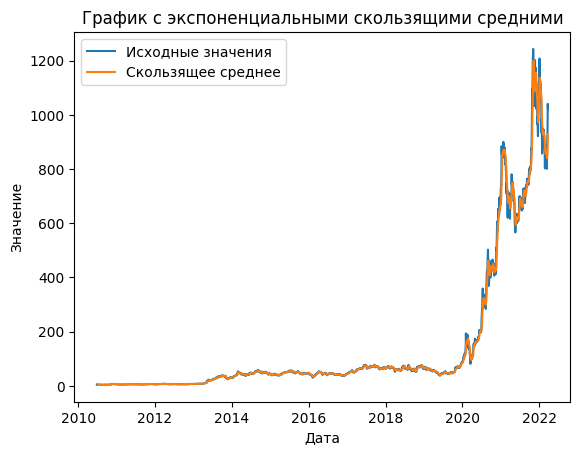

In [8]:
rolling_mean = data["Value"].rolling(window=8).mean()
plt.plot(data.index, data["Value"], label="Исходные значения")
plt.plot(data.index, rolling_mean, label="Скользящее среднее")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("График с экспоненциальными скользящими средними")
plt.legend()
plt.show()

На графике с экспоненциальными скользящими отображены исходные данные (цены актива) и экспоненциальное скользящее среднее (EMA).
EMA сглаживает колебания цены, придавая больший вес последним данным, что позволяет более чётко увидеть краткосрочные тренды.
График показывает, что EMA плотно следует за трендом исходных данных, хотя и сглаживает резкие скачки.

### Прогнозирование на основе EMA 5

In [12]:
forecast_periods = 5
forecast_ema_5 = [data['EMA_5'].iloc[-1]] * forecast_periods

### Прогнозируемые даты

In [13]:
forecast_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=forecast_periods)

### Построение графика прогноза

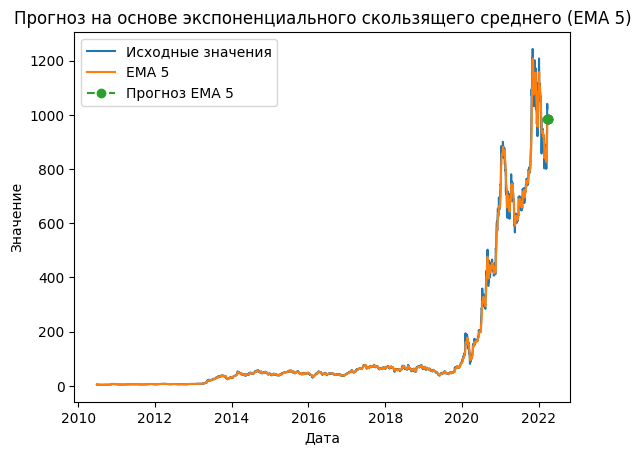

In [14]:
plt.plot(data.index, data["Value"], label="Исходные значения")
plt.plot(data.index, data['EMA_5'], label="EMA 5")
plt.plot(forecast_dates, forecast_ema_5, label="Прогноз EMA 5", linestyle='--', marker='o')
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Прогноз на основе экспоненциального скользящего среднего (EMA 5)")
plt.legend()
plt.show()

Прогноз на основе EMA 5 отображает как исходные данные, так и прогноз, основанный на экспоненциальном скользящем среднем с периодом 5.
Прогнозируемые значения предполагают, что цена в будущем останется примерно на уровне последнего значения EMA.
Это значит, что если текущее значение EMA указывает на восходящий тренд, то прогноз предполагает продолжение этого тренда на следующие несколько периодов (в данном случае 5 периодов).